In [1]:
import tensorflow as tf #conda install tensorflow

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
#shape(train_images) is 60000x28x28; reshape to 60000x28x28x1
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)   #10000 test images
train_images = train_images/255.0   #normalize values to [0, 1]
test_images = test_images/255.0

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),   #relu returns max(0, x)
    tf.keras.layers.MaxPooling2D(2, 2), #effectively quarters image size
    tf.keras.layers.Flatten(),  #flattens layer
    tf.keras.layers.Dense(512, activation='relu'),  #512 neurons in hidden layer
    tf.keras.layers.Dense(10, activation='softmax') #collapse probability vector (softmax)
    ])

#Adam is a type of stochastic gradient descent
#Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events
#Also viewed as number of bits of information needed to communicate between two distributions
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 41s 682us/sample - loss: 0.1297 - accuracy: 0.9611
Epoch 2/3
60000/60000 [==============================] - 44s 731us/sample - loss: 0.0423 - accuracy: 0.9870
Epoch 3/3
60000/60000 [==============================] - 52s 861us/sample - loss: 0.0244 - accuracy: 0.9919


In [13]:
loss, accuracy = model.evaluate(test_images, test_labels)
test_predictions = model.predict(test_images)

10000/10000 [==============================] - 2s 202us/sample - loss: 0.0408 - accuracy: 0.9858


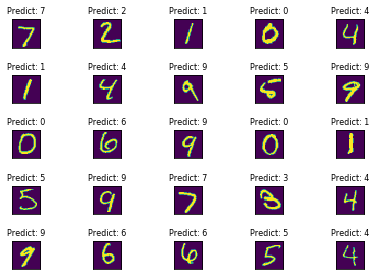

In [27]:
#show first few test images
import numpy as np
import matplotlib.pyplot as plt
plot_size = 5
fig, arr = plt.subplots(plot_size, plot_size)
for i in range(0, plot_size**2):
    arr[int(i/plot_size), i%plot_size].imshow(test_images[i].reshape(28, 28))
    #remove tick marks on axes
    arr[int(i/plot_size), i%plot_size].axes.xaxis.set_visible(False)
    arr[int(i/plot_size), i%plot_size].axes.yaxis.set_visible(False)
    arr[int(i/plot_size), i%plot_size].set_title("Predict: {predict:n}".format(predict=np.argmax(test_predictions[i])), fontsize=8)
fig.tight_layout()
fig.show()